In [1]:
from run_twitter import *

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})

In [3]:
ops_all = np.array(pd.read_csv(f'./Twitter/vax_ops.txt', sep=' ', header=None))/10

In [4]:
multi_trainL = []
l2_trainL = []
multi_testL = []
l2_testL = []
lboth_trainL = []
l1_trainL = []
lboth_testL = []
l1_testL = []
lbds = []
bsline = []
for start_point in range(0,500,50):
    print("start time stamp:", start_point)
    train_l_multi, test_l_multi, lambda_multi = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'multi', 
                                                               start_pos=start_point, printall=True)
    train_l_l2, test_l_l2, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l2', 
                                                         start_pos=start_point)
    train_l_lboth, test_l_lboth, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'lboth', 
                                                               start_pos=start_point)
    train_l_l1, test_l_l1, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l1', 
                                                         start_pos=start_point)
    
    multi_trainL.append(train_l_multi)
    l2_trainL.append(train_l_l2)
    multi_testL.append(test_l_multi)
    l2_testL.append(test_l_l2)
    lboth_trainL.append(train_l_lboth)
    l1_trainL.append(train_l_l1)
    lboth_testL.append(test_l_lboth)
    l1_testL.append(test_l_l1)
    lbds.append(lambda_multi)
    baseline = []
    for i in range(1,6):
        baseline.append(np.average(np.absolute(ops_all[:,start_point+44+i] - ops_all[:,0])))
    bsline.append(np.average(baseline))
    print(start_point, "train loss, multiFJ:", train_l_multi[-1], "L2 only:", train_l_l2[-1], 
              "\n \t L1 only:", train_l_l1[-1], "lboth:", train_l_lboth[-1],
              "\n test loss, multiFJ:", np.average(test_l_multi), "L2 only:",
              np.average(test_l_l2), "\n \t L1 only:", np.average(test_l_l1), "lboth:", np.average(test_l_lboth),
              "baseline:", np.average(baseline))
    print("lambda distribution")
    plt.hist(np.ravel(np.array(lambda_multi)))
    plt.show()

start time stamp: 0
Algorithm multi
Initial:  0.05639749248741496
Epoch: 0, loss 0.056270432
Epoch: 1, loss 0.055986699
Epoch: 2, loss 0.055708552
Epoch: 3, loss 0.05543315
Epoch: 4, loss 0.055156982
Epoch: 5, loss 0.054875616
Epoch: 6, loss 0.054585957
Epoch: 7, loss 0.054284096
Epoch: 8, loss 0.053966637
Epoch: 9, loss 0.053629464
Epoch: 10, loss 0.053269215
Epoch: 11, loss 0.052885669
Epoch: 12, loss 0.052479866
Epoch: 13, loss 0.052044942
Epoch: 14, loss 0.051583532
Epoch: 15, loss 0.051096815
Epoch: 16, loss 0.050734648
Epoch: 17, loss 0.050414206
Epoch: 18, loss 0.050112068
Epoch: 19, loss 0.049823542
Epoch: 20, loss 0.049545314
Epoch: 21, loss 0.0492791
Epoch: 22, loss 0.049025004
Epoch: 23, loss 0.048779893
Epoch: 24, loss 0.048543682
Epoch: 25, loss 0.048318658
Epoch: 26, loss 0.048101661
Epoch: 27, loss 0.047893621
Epoch: 28, loss 0.047692432
Epoch: 29, loss 0.047499132
Epoch: 30, loss 0.047314295
Epoch: 31, loss 0.047137523
Epoch: 32, loss 0.046967702
Epoch: 33, loss 0.04680

KeyboardInterrupt: 

start time stamp: 0
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
0 train loss, multiFJ: 0.06514886263666658 L2 only: 0.07431302321614322 
 	 L1 only: 0.06487830868695446 lboth: 0.06777771670834862 
 test loss, multiFJ: 0.016486194420482783 L2 only: 0.020983927355285783 
 	 L1 only: 0.016334344327178053 lboth: 0.017580789466143058 baseline: 0.02420205376019329
lambda distribution


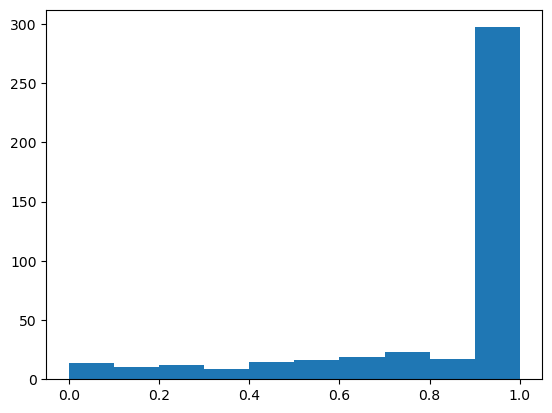

start time stamp: 50
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
50 train loss, multiFJ: 0.08087513695872493 L2 only: 0.0982892052709423 
 	 L1 only: 0.08008856883728088 lboth: 0.08591714528210465 
 test loss, multiFJ: 0.0234064089981105 L2 only: 0.02636748287201395 
 	 L1 only: 0.0233509129713999 lboth: 0.024163049145900638 baseline: 0.021321705426356592
lambda distribution


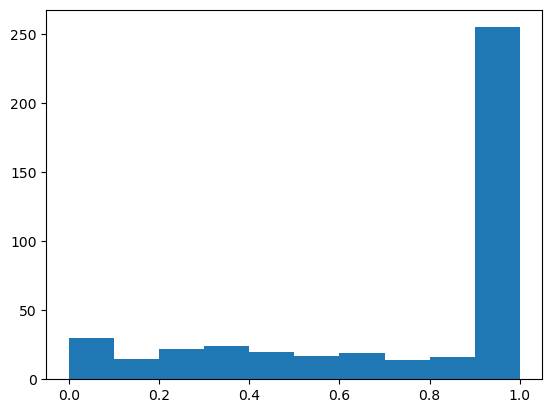

start time stamp: 100
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
100 train loss, multiFJ: 0.10091624406638568 L2 only: 0.11852814179504653 
 	 L1 only: 0.09972304523819928 lboth: 0.10709260989238362 
 test loss, multiFJ: 0.02866807183192316 L2 only: 0.0303310887384358 
 	 L1 only: 0.028800949571305058 lboth: 0.02906215804444815 baseline: 0.017563565891472864
lambda distribution


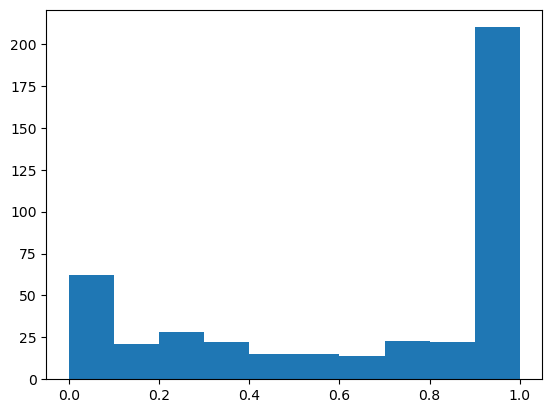

start time stamp: 150
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
150 train loss, multiFJ: 0.14315690746659027 L2 only: 0.13976219399623616 
 	 L1 only: 0.1476974206463224 lboth: 0.14283916922550768 
 test loss, multiFJ: 0.03636125169782532 L2 only: 0.033905183653844574 
 	 L1 only: 0.05036904270047653 lboth: 0.04169038308621845 baseline: 0.01944739756367663
lambda distribution


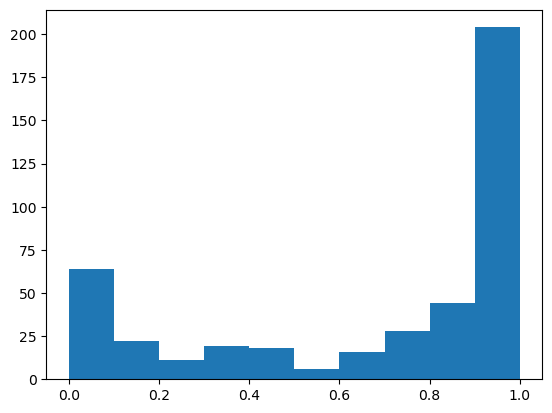

start time stamp: 200
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
200 train loss, multiFJ: 0.15708742817860621 L2 only: 0.15701122401968282 
 	 L1 only: 0.21264068703143382 lboth: 0.18051962590286674 
 test loss, multiFJ: 0.03808658090971301 L2 only: 0.038077174376136 
 	 L1 only: 0.0629113089742637 lboth: 0.05035421247007242 baseline: 0.02229512735326689
lambda distribution


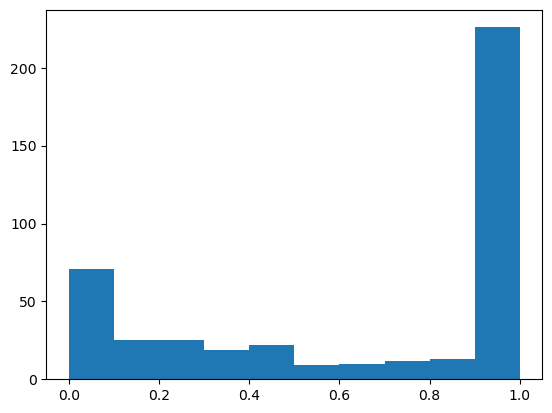

start time stamp: 250
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
250 train loss, multiFJ: 0.1741029490559796 L2 only: 0.1712935139882079 
 	 L1 only: 0.19173828285684072 lboth: 0.17216381373211379 
 test loss, multiFJ: 0.038012408750593876 L2 only: 0.038347912745561985 
 	 L1 only: 0.03595072767977038 lboth: 0.03395723796042914 baseline: 0.01795348837209302
lambda distribution


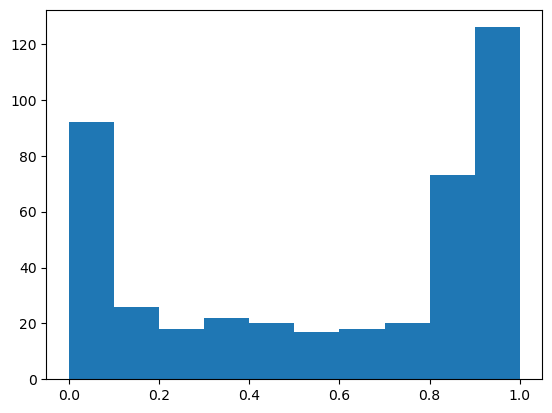

start time stamp: 300
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
300 train loss, multiFJ: 0.13454733554497741 L2 only: 0.16783719607557082 
 	 L1 only: 0.12981665660071884 lboth: 0.14492484082057344 
 test loss, multiFJ: 0.022366612433832617 L2 only: 0.034593664596269544 
 	 L1 only: 0.020045445391111267 lboth: 0.02638041612524187 baseline: 0.01873355481727575
lambda distribution


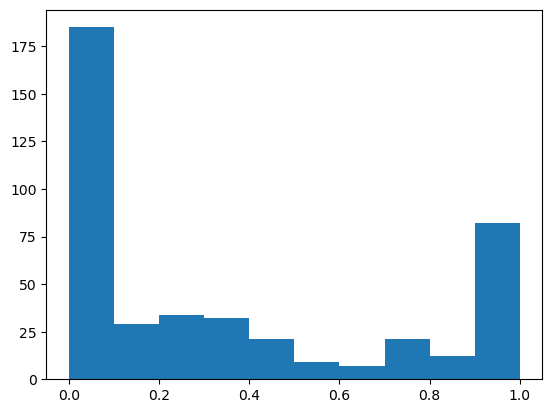

start time stamp: 350
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
350 train loss, multiFJ: 0.09552710206928561 L2 only: 0.1575967133575883 
 	 L1 only: 0.09469211012550116 lboth: 0.1234164091398037 
 test loss, multiFJ: 0.04647376233313892 L2 only: 0.034543230036515216 
 	 L1 only: 0.04684959556248879 lboth: 0.04030553693444452 baseline: 0.01707198228128461
lambda distribution


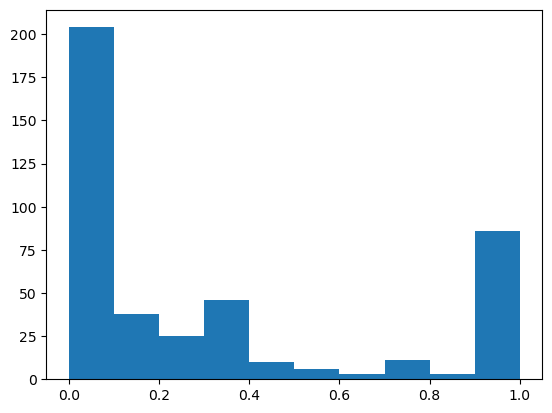

In [8]:
multi_trainL = []
l2_trainL = []
multi_testL = []
l2_testL = []
lboth_trainL = []
l1_trainL = []
lboth_testL = []
l1_testL = []
lbds = []
for start_point in range(0,400,50):
    print("start time stamp:", start_point)
    train_l_multi, test_l_multi, lambda_multi = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'multi', 
                                                               start_pos=start_point, T_train=100)
    train_l_l2, test_l_l2, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l2', 
                                                         start_pos=start_point, T_train=100)
    train_l_lboth, test_l_lboth, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'lboth', 
                                                               start_pos=start_point, T_train=100)
    train_l_l1, test_l_l1, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l1', 
                                                         start_pos=start_point, T_train=100)
    
    multi_trainL.append(train_l_multi)
    l2_trainL.append(train_l_l2)
    multi_testL.append(test_l_multi)
    l2_testL.append(test_l_l2)
    lboth_trainL.append(train_l_lboth)
    l1_trainL.append(train_l_l1)
    lboth_testL.append(test_l_lboth)
    l1_testL.append(test_l_l1)
    lbds.append(lambda_multi)
    baseline = []
    for i in range(1,6):
        baseline.append(np.average(np.absolute(ops_all[:,start_point+100+i] - ops_all[:,start_point+100])))
    
    print(start_point, "train loss, multiFJ:", train_l_multi[-1], "L2 only:", train_l_l2[-1], 
              "\n \t L1 only:", train_l_l1[-1], "lboth:", train_l_lboth[-1],
              "\n test loss, multiFJ:", np.average(test_l_multi), "L2 only:",
              np.average(test_l_l2), "\n \t L1 only:", np.average(test_l_l1), "lboth:", np.average(test_l_lboth),
              "baseline:", np.average(baseline))
    print("lambda distribution")
    plt.hist(np.ravel(np.array(lambda_multi)))
    plt.show()

In [11]:
bsline = []
for start_point in range(0,400,50):
    baseline = []
    for i in range(1,6):
        baseline.append(np.average(np.absolute(ops_all[:,start_point+100+i] - ops_all[:,start_point+100])))
    bsline.append(np.average(baseline))

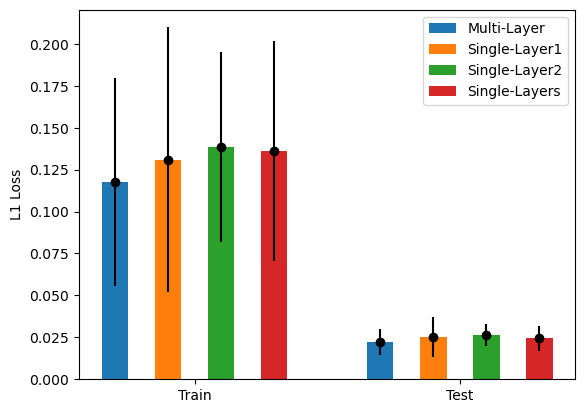

In [24]:
plt.bar([0,1], [np.average(multi_trainL),np.average(multi_testL)], width=0.1, label='Multi-Layer')

plt.errorbar([0,1], [np.average(multi_trainL),np.average(multi_testL)],
             [ np.std(multi_trainL) ,np.std(multi_testL)], fmt="o", color='black')

plt.bar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)], width=0.1, label='Single-Layer1')

plt.errorbar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)],
             [ np.std(l1_trainL) ,np.std(l1_testL)], fmt="o", color='black')

plt.bar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)], width=0.1, label='Single-Layer2')

plt.errorbar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)],
             [ np.std(l2_trainL) ,np.std(l2_testL)], fmt="o", color='black')

plt.bar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)], width=0.1, label='Single-Layers')

plt.errorbar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)],
             [ np.std(lboth_trainL) ,np.std(lboth_testL)], fmt="o", color='black')

# plt.bar([1.8], [np.average(bsline)], width=0.1)

# plt.errorbar([1.8], [np.average(bsline)],
#              [ np.std(bsline)], fmt="o", color='r')
plt.legend()
plt.xticks([0.3,1.3],['Train','Test'])
plt.ylabel('L1 Loss')
plt.show()

In [ ]:
lossL1(5, np.ones(430), ops, Ws_, x_test, y_test, criterion = torch.nn.L1Loss())

start time stamp: 0
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
0 train loss, multiFJ: 0.03188152061145194 L2 only: 0.039531978417745646 
 	 L1 only: 0.03188071221141825 lboth: 0.0346409152040046 
 test loss, multiFJ: 0.011418685031988498 L2 only: 0.013919908954635758 
 	 L1 only: 0.01140279622987918 lboth: 0.01236904093171741 baseline: 0.02420205376019329
lambda distribution


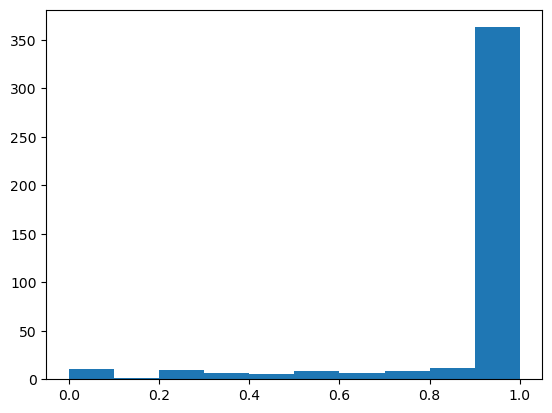

start time stamp: 40
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
40 train loss, multiFJ: 0.05818699584143281 L2 only: 0.07418087466477506 
 	 L1 only: 0.05607200824542612 lboth: 0.06370009111418495 
 test loss, multiFJ: 0.014954506607677354 L2 only: 0.017132111462940528 
 	 L1 only: 0.014817800771057774 lboth: 0.015404163475149812 baseline: 0.018322480620155037
lambda distribution


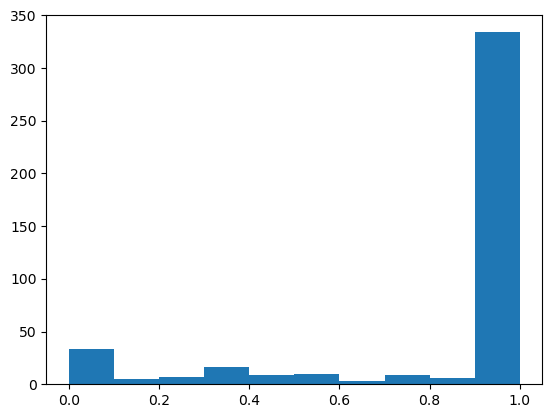

start time stamp: 80
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
80 train loss, multiFJ: 0.04944213131887756 L2 only: 0.08688654337503988 
 	 L1 only: 0.04943396189397208 lboth: 0.06490173604068795 
 test loss, multiFJ: 0.015483895847830512 L2 only: 0.019712143403337577 
 	 L1 only: 0.015485728750434516 lboth: 0.016735641846368284 baseline: 0.02462458471760797
lambda distribution


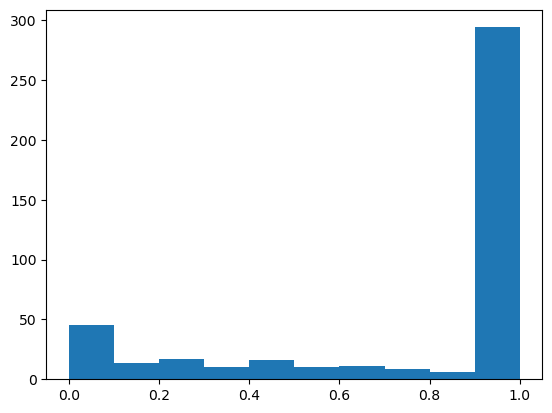

start time stamp: 120
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
120 train loss, multiFJ: 0.06572810634014165 L2 only: 0.10069028809144775 
 	 L1 only: 0.06504802799243477 lboth: 0.08145969228321688 
 test loss, multiFJ: 0.019283014783635068 L2 only: 0.024315503655417927 
 	 L1 only: 0.01918855793261483 lboth: 0.021507356052869867 baseline: 0.02303720930232558
lambda distribution


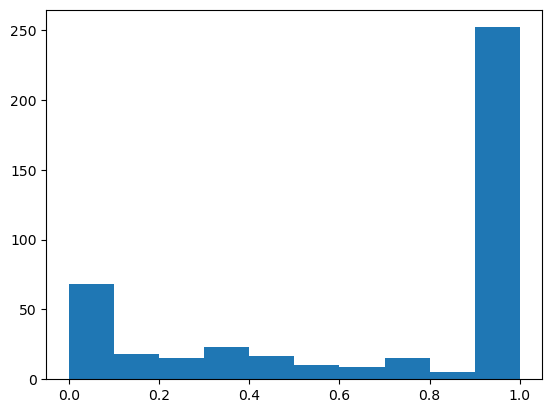

start time stamp: 160
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
160 train loss, multiFJ: 0.10356966866623543 L2 only: 0.11920585762582722 
 	 L1 only: 0.10147750479515101 lboth: 0.10919799034096536 
 test loss, multiFJ: 0.025556937736872405 L2 only: 0.026918665808518483 
 	 L1 only: 0.02571313734149238 lboth: 0.026056916435579197 baseline: 0.019069767441860463
lambda distribution


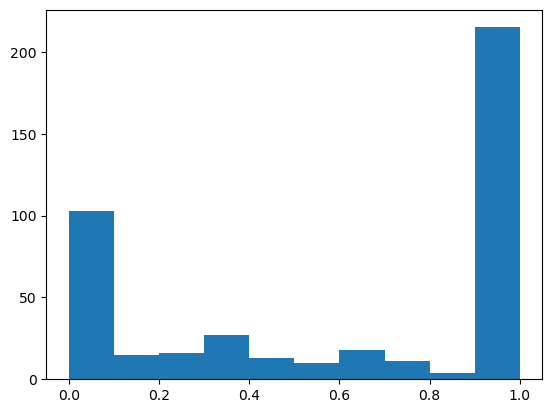

start time stamp: 200
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
200 train loss, multiFJ: 0.13088624211814967 L2 only: 0.12785866328474038 
 	 L1 only: 0.1265481785295529 lboth: 0.1272916800355244 
 test loss, multiFJ: 0.03132831469813009 L2 only: 0.029403704693186362 
 	 L1 only: 0.045836331660349026 lboth: 0.03734548373431968 baseline: 0.02229512735326689
lambda distribution


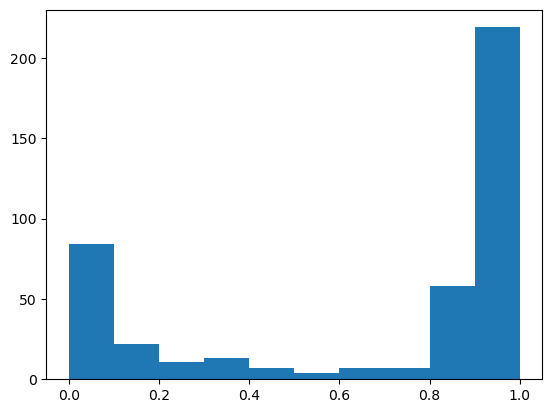

start time stamp: 240
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
240 train loss, multiFJ: 0.1423347081141391 L2 only: 0.14223430942508003 
 	 L1 only: 0.24251435021794537 lboth: 0.18700225047680677 
 test loss, multiFJ: 0.03137132103481731 L2 only: 0.03135685663649832 
 	 L1 only: 0.042634877596318524 lboth: 0.033386685151455237 baseline: 0.017643300110741972
lambda distribution


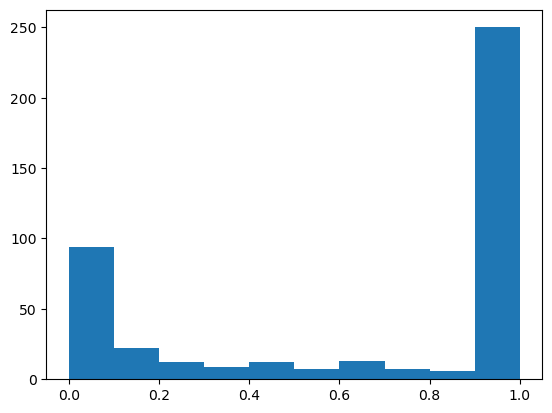

start time stamp: 280
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
280 train loss, multiFJ: 0.15725607046011666 L2 only: 0.1571903914131933 
 	 L1 only: 0.2506233165954499 lboth: 0.19297899138889008 
 test loss, multiFJ: 0.03335280878426407 L2 only: 0.03334341472682038 
 	 L1 only: 0.0408674756116293 lboth: 0.02962756602868777 baseline: 0.012670542635658916
lambda distribution


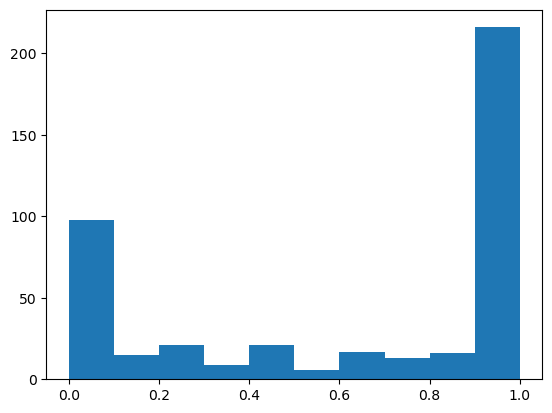

start time stamp: 320
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
320 train loss, multiFJ: 0.09379986183577521 L2 only: 0.15369287482982646 
 	 L1 only: 0.09306012456809754 lboth: 0.11979786004836628 
 test loss, multiFJ: 0.026018333257226474 L2 only: 0.03340455347374755 
 	 L1 only: 0.025929118388390092 lboth: 0.029050237580350913 baseline: 0.011998560354374308
lambda distribution


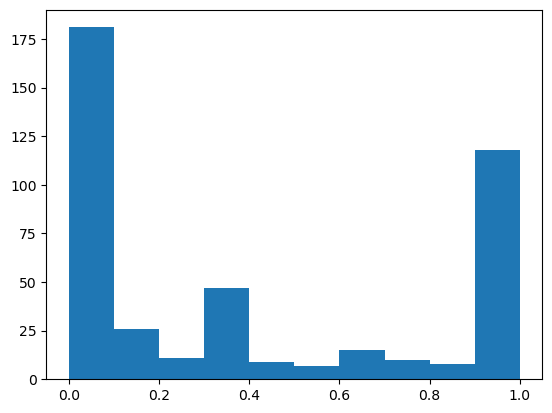

start time stamp: 360
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1
360 train loss, multiFJ: 0.10354046877492744 L2 only: 0.1480894222435677 
 	 L1 only: 0.10348895999191851 lboth: 0.1262751625024787 
 test loss, multiFJ: 0.021722770650070986 L2 only: 0.03196227088571938 
 	 L1 only: 0.021709736907216882 lboth: 0.026686068486320835 baseline: 0.014737209302325582
lambda distribution


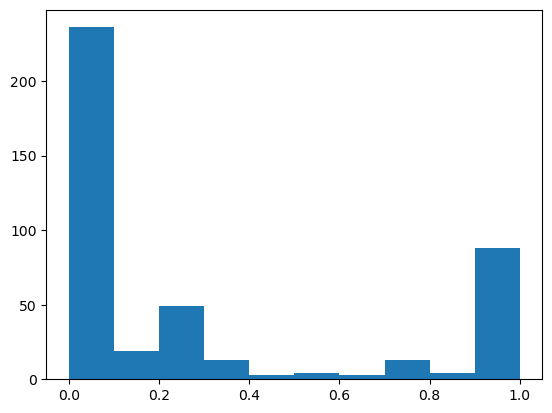

start time stamp: 400
Algorithm multi
Algorithm l2
Algorithm lboth
Algorithm l1


IndexError: index 501 is out of bounds for axis 1 with size 501

In [13]:
multi_trainL = []
l2_trainL = []
multi_testL = []
l2_testL = []
lboth_trainL = []
l1_trainL = []
lboth_testL = []
l1_testL = []
lbds = []
bsline = []
for start_point in range(0,450,40):
    print("start time stamp:", start_point)
    train_l_multi, test_l_multi, lambda_multi = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'multi', 
                                                               start_pos=start_point, T_train=30, T_test=5)
    train_l_l2, test_l_l2, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l2', 
                                                         start_pos=start_point, T_train=30, T_test=5)
    train_l_lboth, test_l_lboth, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'lboth', 
                                                               start_pos=start_point, T_train=30, T_test=5)
    train_l_l1, test_l_l1, _ = make_experiments_twitter_new(n = 430, optype = 'vax', algname = 'l1', 
                                                         start_pos=start_point, T_train=30, T_test=5)
    
    multi_trainL.append(train_l_multi)
    l2_trainL.append(train_l_l2)
    multi_testL.append(test_l_multi)
    l2_testL.append(test_l_l2)
    lboth_trainL.append(train_l_lboth)
    l1_trainL.append(train_l_l1)
    lboth_testL.append(test_l_lboth)
    l1_testL.append(test_l_l1)
    lbds.append(lambda_multi)
    baseline = []
    for i in range(1,6):
        baseline.append(np.average(np.absolute(ops_all[:,start_point+100+i] - ops_all[:,start_point+100])))
    bsline.append(np.average(baseline))
    print(start_point, "train loss, multiFJ:", train_l_multi[-1], "L2 only:", train_l_l2[-1], 
              "\n \t L1 only:", train_l_l1[-1], "lboth:", train_l_lboth[-1],
              "\n test loss, multiFJ:", np.average(test_l_multi), "L2 only:",
              np.average(test_l_l2), "\n \t L1 only:", np.average(test_l_l1), "lboth:", np.average(test_l_lboth),
              "baseline:", np.average(baseline))
    print("lambda distribution")
    plt.hist(np.ravel(np.array(lambda_multi)))
    plt.show()

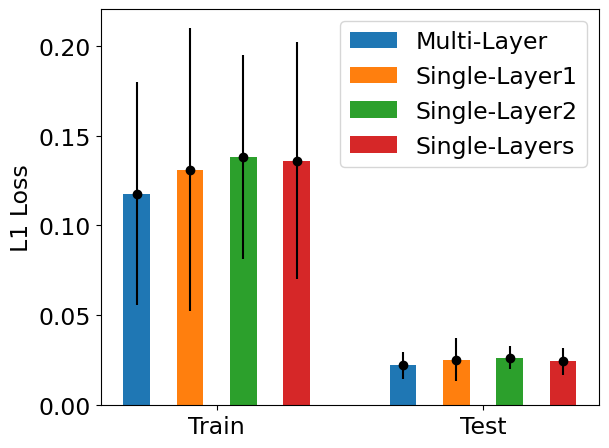

In [30]:
plt.bar([0,1], [np.average(multi_trainL),np.average(multi_testL)], width=0.1, label='Multi-Layer')

plt.errorbar([0,1], [np.average(multi_trainL),np.average(multi_testL)],
             [ np.std(multi_trainL) ,np.std(multi_testL)], fmt="o", color='black')

plt.bar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)], width=0.1, label='Single-Layer1')

plt.errorbar([0.2,1.2], [np.average(l1_trainL),np.average(l1_testL)],
             [ np.std(l1_trainL) ,np.std(l1_testL)], fmt="o", color='black')

plt.bar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)], width=0.1, label='Single-Layer2')

plt.errorbar([0.4,1.4], [np.average(l2_trainL),np.average(l2_testL)],
             [ np.std(l2_trainL) ,np.std(l2_testL)], fmt="o", color='black')

plt.bar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)], width=0.1, label='Single-Layers')

plt.errorbar([0.6,1.6], [np.average(lboth_trainL),np.average(lboth_testL)],
             [ np.std(lboth_trainL) ,np.std(lboth_testL)], fmt="o", color='black')

# plt.bar([1.8], [np.average(bsline)], width=0.1)

# plt.errorbar([1.8], [np.average(bsline)],
#              [ np.std(bsline)], fmt="o", color='r')
plt.legend()
plt.xticks([0.3,1.3],['Train','Test'])
plt.ylabel('L1 Loss')
plt.tight_layout()
plt.savefig('fit_vax.png')
plt.show()

In [22]:
np.average(bsline),np.average(multi_testL)

(0.018860083559851, 0.022263700770598475)

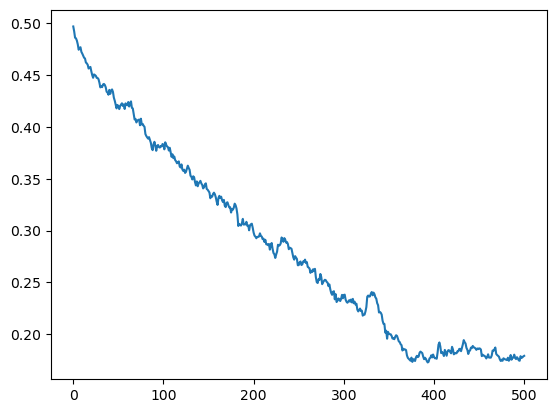

In [19]:
plt.plot(np.average(ops_all, axis=0))